### 🏙️ Project 02 – Empire State Building Random Walk (Hacker Statistics)

<center><img src="empire_state1.jpeg"></center>

We simulate 100-step random walks 500 times to estimate the chance of ending at **≥ 60 steps**.

**Rules**
- Start at step 0 and never go below 0.
- Each move (x 100):
  - Roll 1–2 → step down 1
  - Roll 3–5 → step up 1
  - Roll 6 → roll again and step up by that new roll (1–6)
- Clumsiness: each move has a **0.1%** chance to fall to step 0.

We’ll plot the distribution of final steps and compute the winning probability.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)  # seed set for reproducibility

#### Simulate random walk 500 times

Collect all walks in `all_walks`. Each walk has 101 values (including the starting step `0`).

In [34]:
# Simulate random walk 500 times
all_walks = []

for i in range(500):
    random_walk = [0]
    for x in range(100):
        step = random_walk[-1]
        dice = np.random.randint(1, 7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1, 7)  # bonus on 6

        # 0.1% chance to fall back to 0
        if np.random.rand() <= 0.001:
            step = 0

        random_walk.append(step)

    # add this finished walk to the collection
    all_walks.append(random_walk)

#### Create `np_aw_t` and extract final positions

Transpose to shape `(101, n_walks)` so the **last row** holds the final steps of all walks.

In [35]:
np_aw_t = np.transpose(np.array(all_walks))  # shape: (101, 500)

# Select last row: final positions for each walk
ends = np_aw_t[-1, :]
ends[:10], ends.shape

(array([ 70,  94,  82,  66, 107,  49,  72, 116,  65,  78]), (500,))

#### Plot histogram of final steps

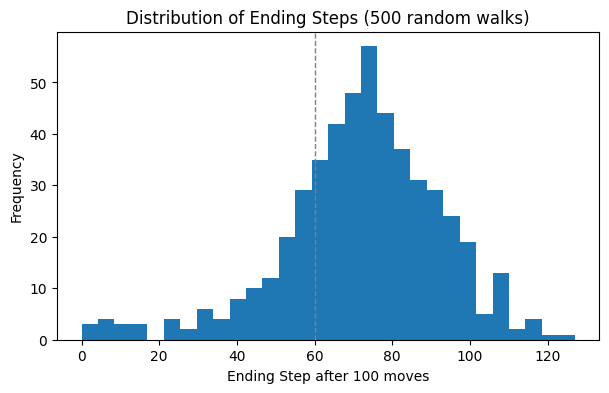

In [36]:
plt.figure(figsize=(7,4))
plt.hist(ends, bins=30)
plt.axvline(60, color='gray', linestyle='--', linewidth=1)
plt.title('Distribution of Ending Steps (500 random walks)')
plt.xlabel('Ending Step after 100 moves')
plt.ylabel('Frequency')
plt.show()

#### ✅ Result: Estimated Winning Chance

**Question:** What’s the estimated chance you’ll reach at least 60 steps?  
Using the simulated `ends` array (final positions of all random walks), compute:

np.mean(ends >= 60) * 100

This returns the percentage of simulations where the final step was ≥ 60, i.e., your estimated chance of winning the bet.

In [37]:

#### Code — Probability
prob_pct = np.mean(ends >= 60) * 100
print(f"Estimated chance of reaching ≥ 60 steps: {prob_pct:.2f}%  (n={ends.size})")

Estimated chance of reaching ≥ 60 steps: 78.40%  (n=500)
